Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings

In [3]:
strk_data = pd.read_csv('dataset//healthcare-dataset-stroke-data.csv')
strk_data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
strk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
strk_data.shape

(5110, 12)

In [6]:
strk_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
strk_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
strk_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Checking for missing values

In [9]:
[features for features in strk_data.columns if strk_data[features].isnull().sum()>0]

['bmi']

vissualizing missing values

<AxesSubplot: >

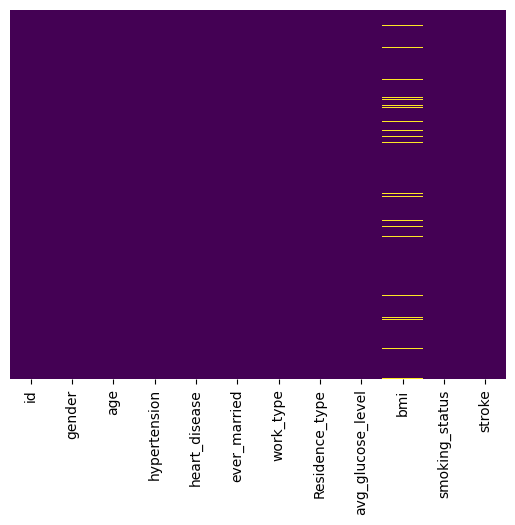

In [10]:
sns.heatmap(strk_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
strk_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Replacing the missing values in bmi by ffill

In [12]:
strk_data['bmi']=strk_data['bmi'].fillna(method='ffill')

In [13]:
strk_data['bmi'].isnull().sum()

0

In [14]:
strk_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot: >

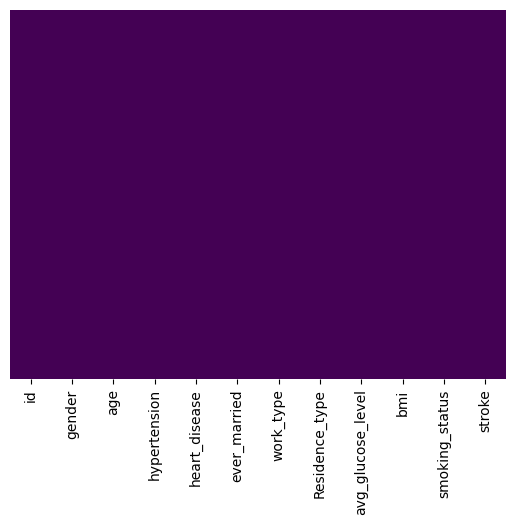

In [15]:
sns.heatmap(strk_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

checking for unique values in each column

In [16]:
strk_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
strk_data['age'].unique

<bound method Series.unique of 0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64>

In [18]:
strk_data['heart_disease'].unique()

array([1, 0], dtype=int64)

In [19]:
strk_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
strk_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
strk_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [22]:
strk_data['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [23]:
strk_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [24]:
strk_data['stroke'].unique()

array([1, 0], dtype=int64)

In [25]:
strk_data1 = strk_data.copy()
strk_data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
strk_data1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Univariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_20336\1265093783.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\HP\AppData\Local\Temp\ipykernel_20336\1265093783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(strk_data1['smoking_status'], palette = 'PuBu'  )


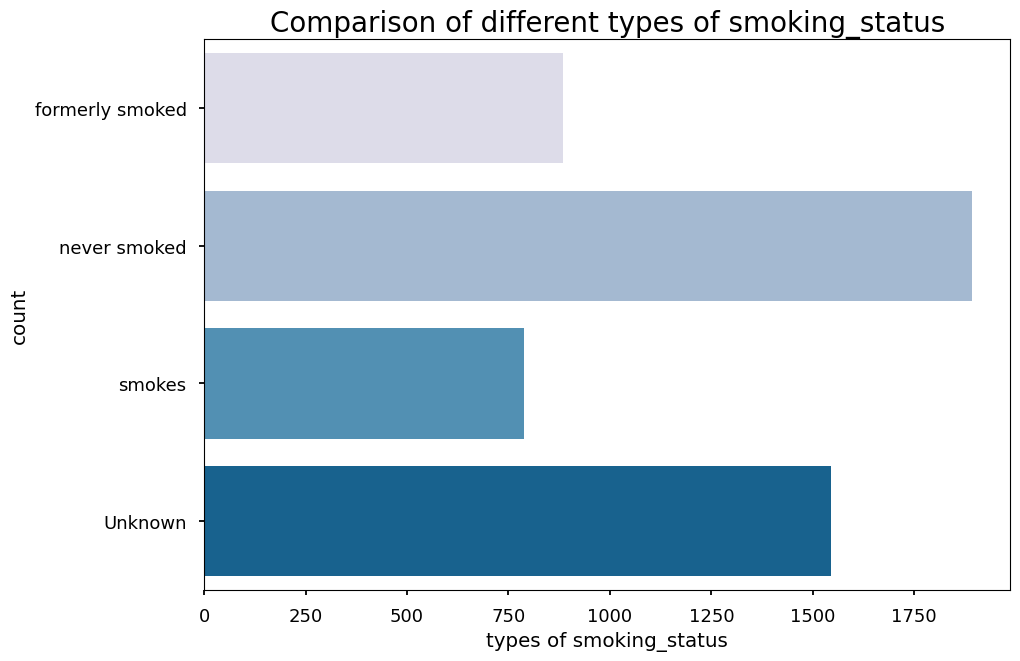

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(strk_data1['smoking_status'], palette = 'PuBu'  )
plt.title('Comparison of different types of smoking_status', fontweight = 30, fontsize = 20)
plt.xlabel('types of smoking_status')
plt.ylabel('count')
plt.show()

Bivariate Aalysis

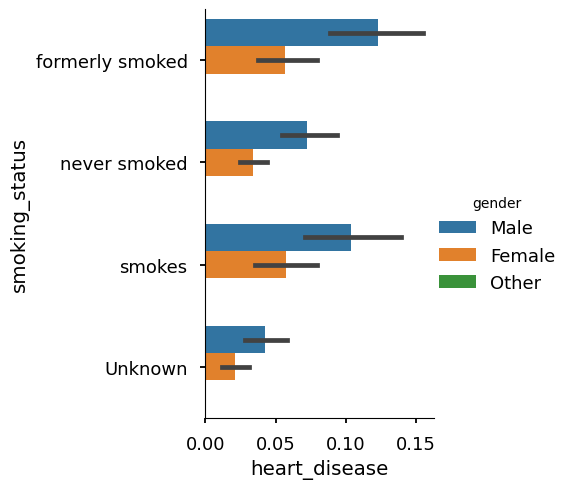

In [30]:
sns.catplot(data=strk_data1, x="heart_disease", y="smoking_status", hue="gender", kind="bar")

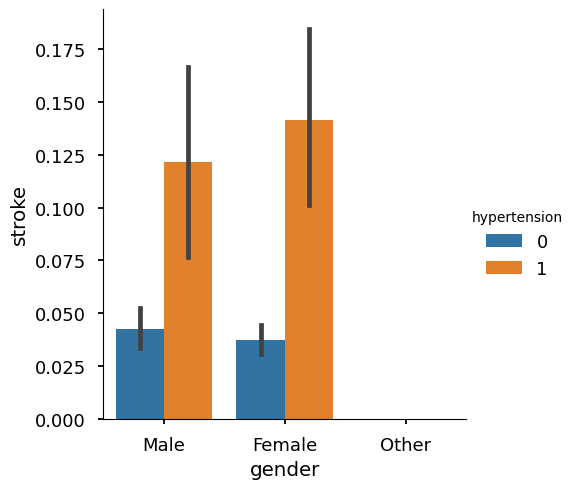

In [31]:
sns.catplot(data=strk_data1, x="gender", y="stroke", hue="hypertension", kind="bar")

Observation: population of married men with hypertension are more than that of the married and unmarried men.

In [36]:
strk_data2 = strk_data1.copy()

In [38]:
strk_data2.drop(columns='id',inplace=True)

Multivariate Analysis

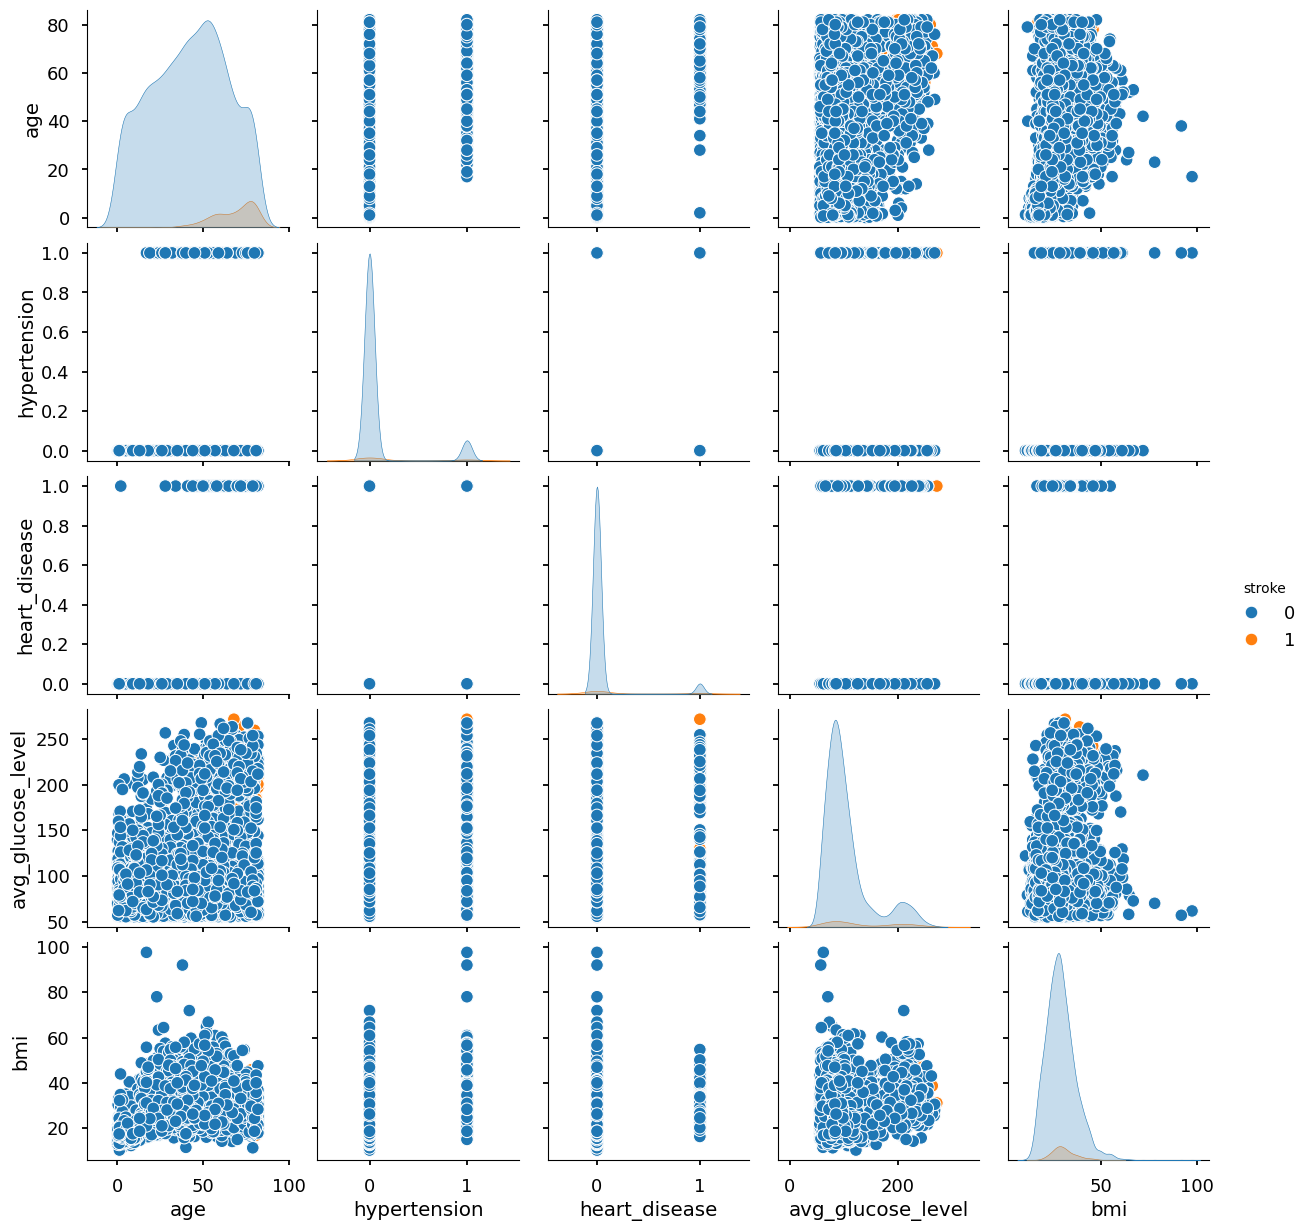

In [39]:
sns.pairplot(strk_data2,hue = 'stroke')
plt.show()

In [40]:
strk_data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
strk_data3= strk_data2.copy()
strk_data3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Visualizing Imbalanced Dataset

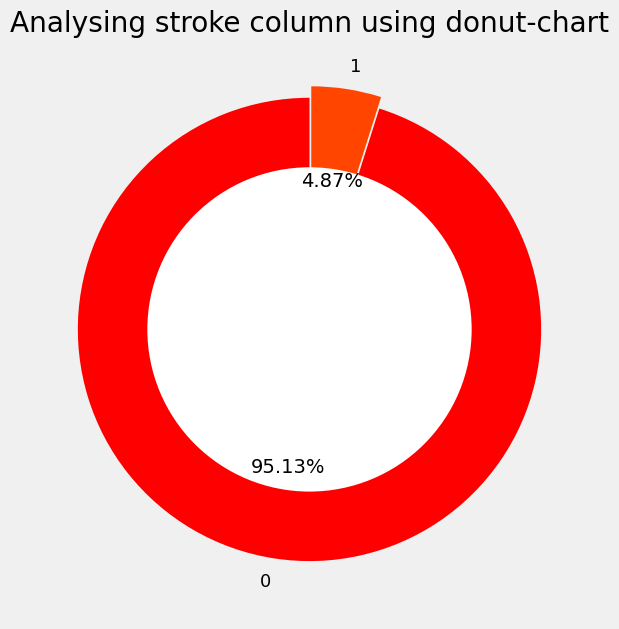

In [42]:
with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(strk_data3['stroke'].value_counts()).values(),
           labels=dict(strk_data3['stroke'].value_counts()).keys(),
           autopct="%.2f%%",
           colors=['red','orangered'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Analysing stroke column using donut-chart")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20336\1360837242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=strk_data3['stroke'],data=strk_data3,palette ='bright',ax=ax[0],saturation=0.95)


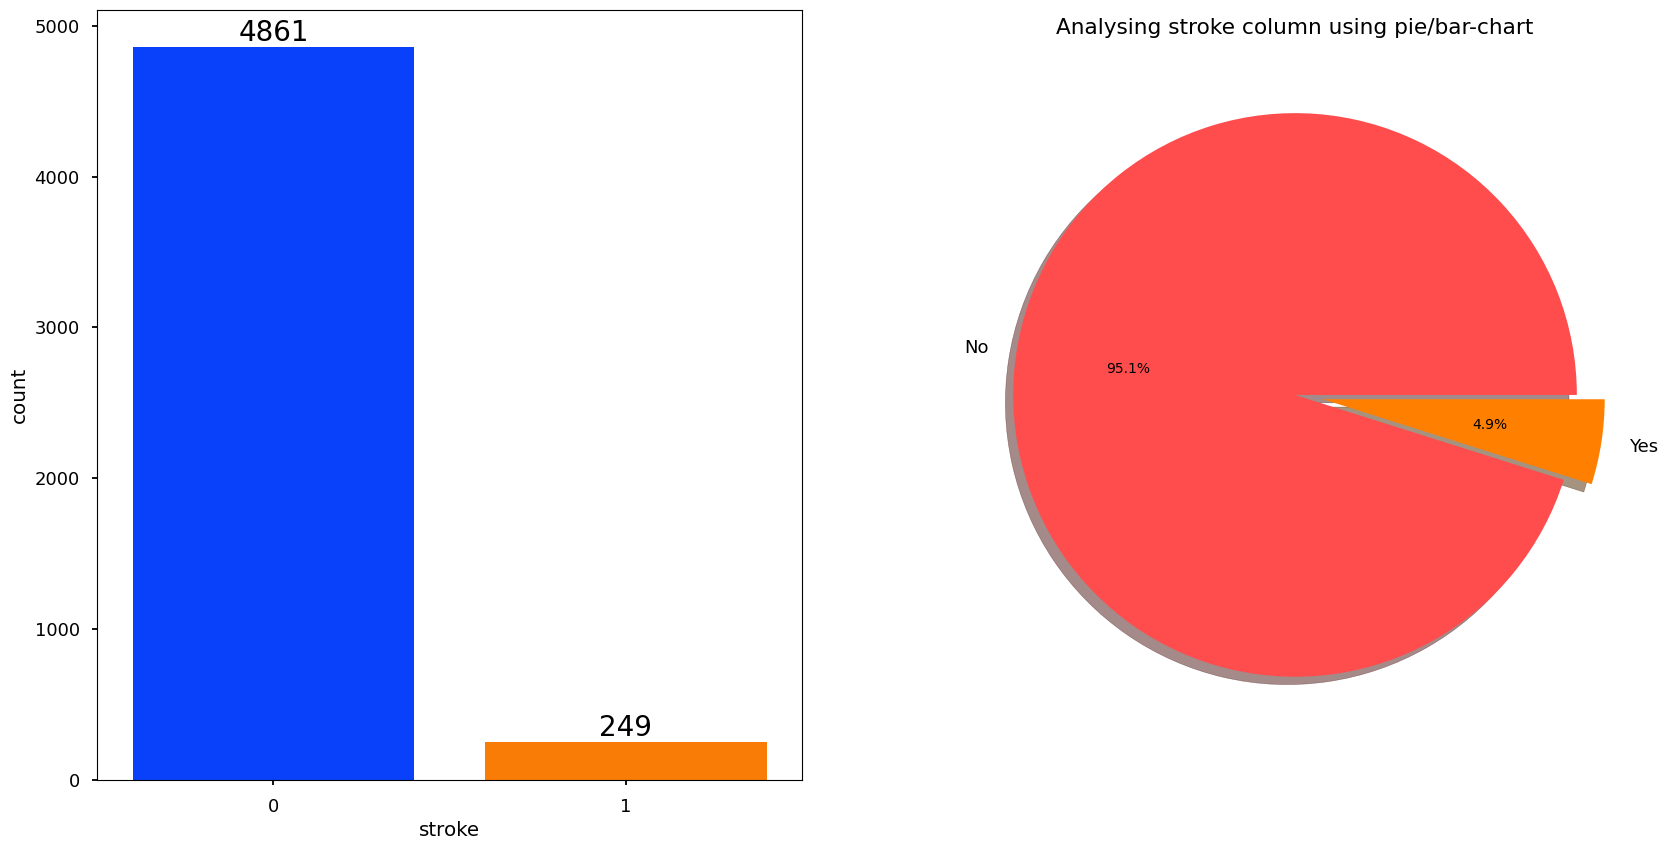

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=strk_data3['stroke'],data=strk_data3,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=strk_data3['stroke'].value_counts(),labels=["No","Yes"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.title(label="Analysing stroke column using pie/bar-chart")
plt.show()

In [44]:
strk_data3.shape

(5110, 11)

Seperating dependent variables(Target) from independent Variables

In [45]:
y=strk_data3['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [46]:
X= strk_data3.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


Solving imbalanced dataset

In [47]:
from imblearn.over_sampling import (RandomOverSampler)

In [48]:
resamp = RandomOverSampler()
X, y = resamp.fit_resample(X, y )

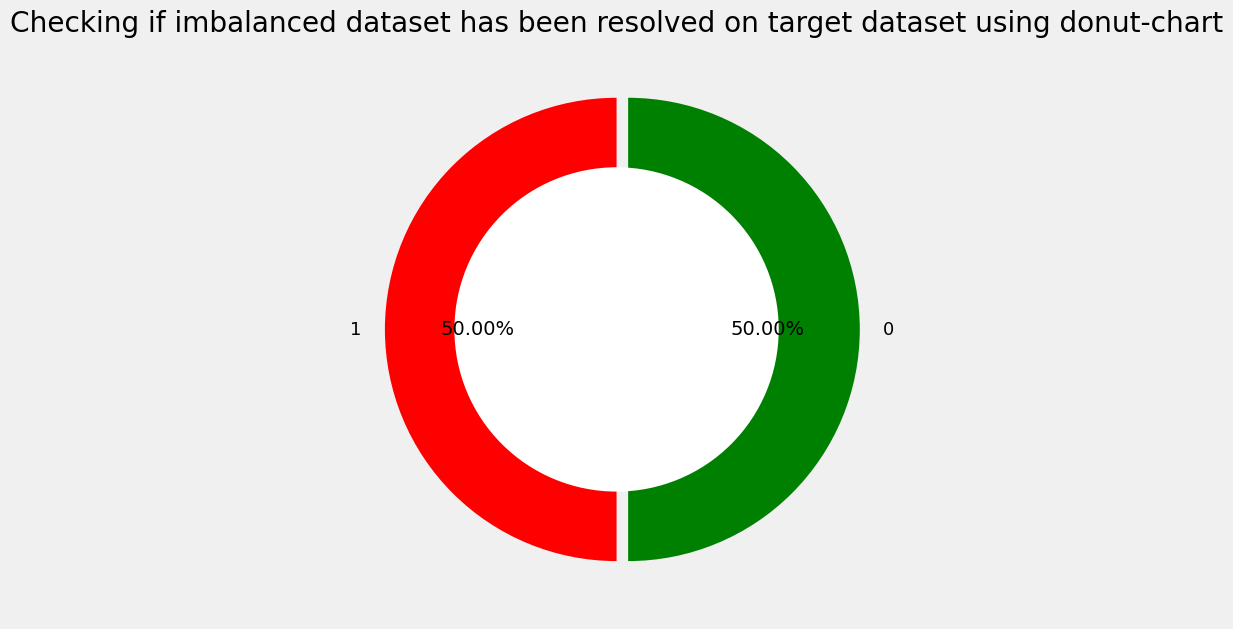

In [49]:
with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(y.value_counts()).values(),
           labels=dict(y.value_counts()).keys(),
           autopct="%.2f%%",
           colors=['red','green'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Checking if imbalanced dataset has been resolved on target dataset using donut-chart")
    plt.show()